In [35]:
import os
import pandas as pd
import scipy.io as sio
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
path='/content/drive/MyDrive/Mental Health/EEG_128channels_resting_lanzhou_2015/subjects_information_EEG_128channels_resting_lanzhou_2015.xlsx'
df=pd.read_excel(path)
print(df.columns)

Index(['subject id', 'type', 'age', 'gender', 'education（years）', 'PHQ-9',
       'CTQ-SF', 'LES', 'SSRS', 'GAD-7', 'PSQI', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subject id        53 non-null     int64  
 1   type              53 non-null     object 
 2   age               53 non-null     int64  
 3   gender            53 non-null     object 
 4   education（years）  53 non-null     int64  
 5   PHQ-9             53 non-null     int64  
 6   CTQ-SF            53 non-null     int64  
 7   LES               53 non-null     int64  
 8   SSRS              53 non-null     int64  
 9   GAD-7             53 non-null     int64  
 10  PSQI              53 non-null     int64  
 11  Unnamed: 11       0 non-null      float64
 12  Unnamed: 12       11 non-null     object 
dtypes: float64(1), int64(9), object(3)
memory usage: 5.5+ KB


In [42]:
df.describe()

,subject id,age,education（years）,PHQ-9,CTQ-SF,LES,SSRS,GAD-7,PSQI,Unnamed: 11
count,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,0.0
mean,2.017941e+06,31.188679,14.735849,9.754717,45.773585,-16.000000,38.037736,7.226415,7.886792,NaN
std,8.168284e+03,9.627798,3.329073,8.320285,9.457682,49.568523,7.753318,6.741495,5.326495,NaN
min,2.010002e+06,16.000000,6.000000,0.000000,33.000000,-173.000000,21.000000,0.000000,0.000000,NaN
25%,2.010021e+06,23.000000,12.000000,3.000000,39.000000,-17.000000,32.000000,1.000000,3.000000,NaN
50%,2.020013e+06,29.000000,16.000000,5.000000,43.000000,-2.000000,40.000000,5.000000,6.000000,NaN
75%,2.020029e+06,40.000000,16.000000,18.000000,50.000000,0.000000,43.000000,13.000000,11.000000,NaN
max,2.030021e+06,52.000000,19.000000,24.000000,77.000000,147.000000,55.000000,21.000000,21.000000,NaN


In [43]:
df[['subject id','type']]

,subject id,type
0,2010002,MDD
1,2010004,MDD
2,2010005,MDD
3,2010006,MDD
4,2010008,MDD
5,2010010,MDD
6,2010011,MDD
7,2010012,MDD
8,2010013,MDD
9,2010015,MDD


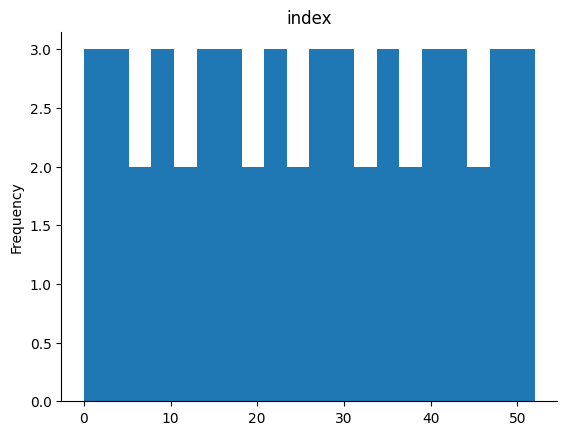

In [44]:
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

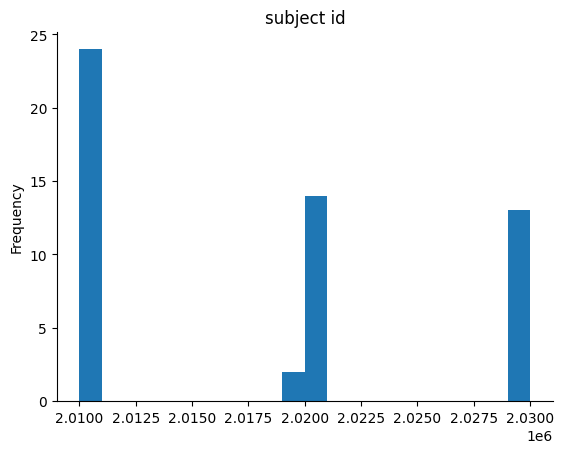

In [45]:
_df_1['subject id'].plot(kind='hist', bins=20, title='subject id')
plt.gca().spines[['top', 'right',]].set_visible(False)

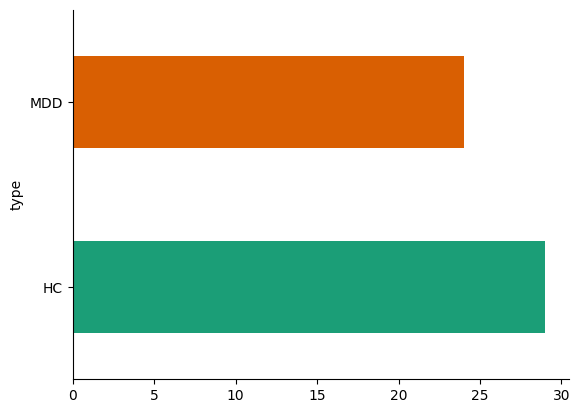

In [46]:
_df_2.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

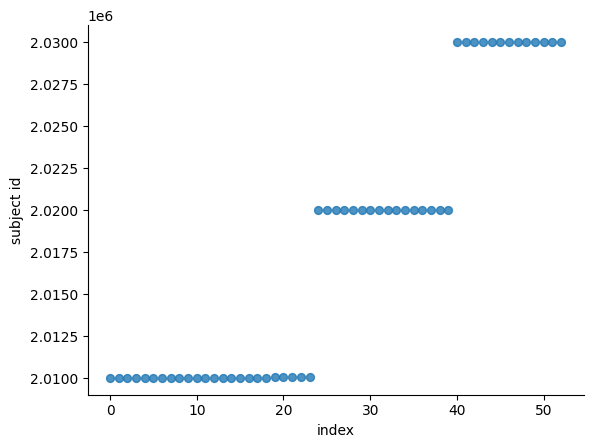

In [47]:
_df_3.plot(kind='scatter', x='index', y='subject id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

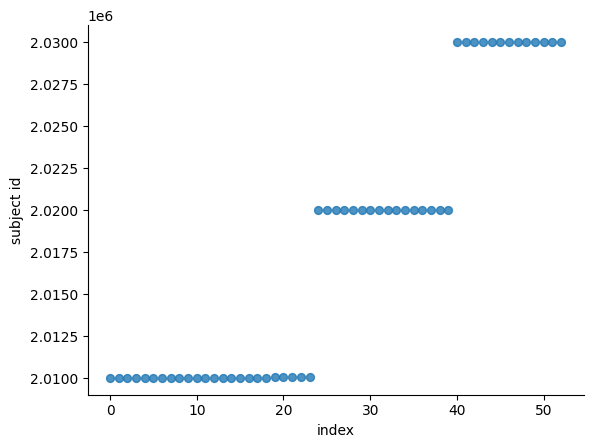

In [48]:
_df_3.plot(kind='scatter', x='index', y='subject id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

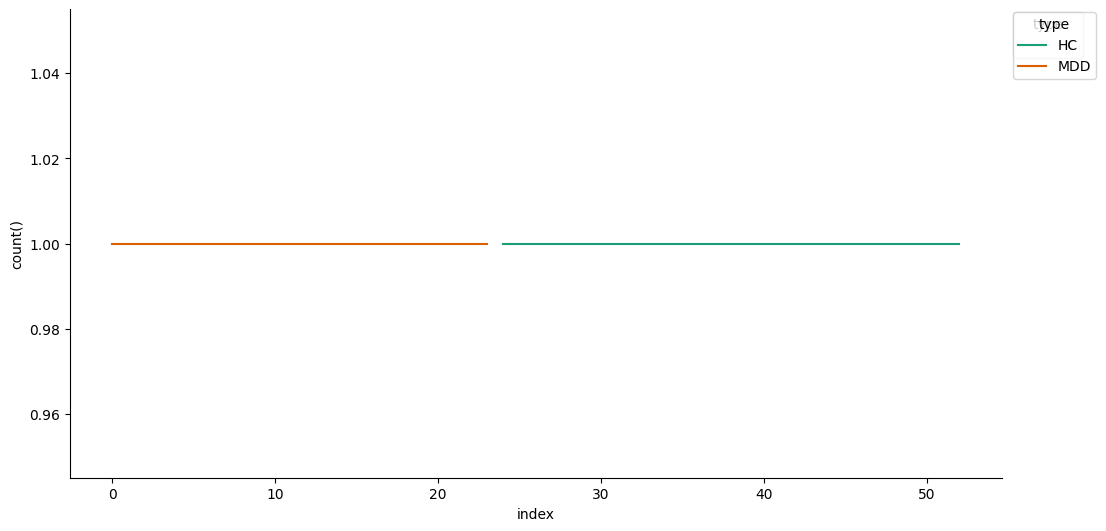

In [49]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

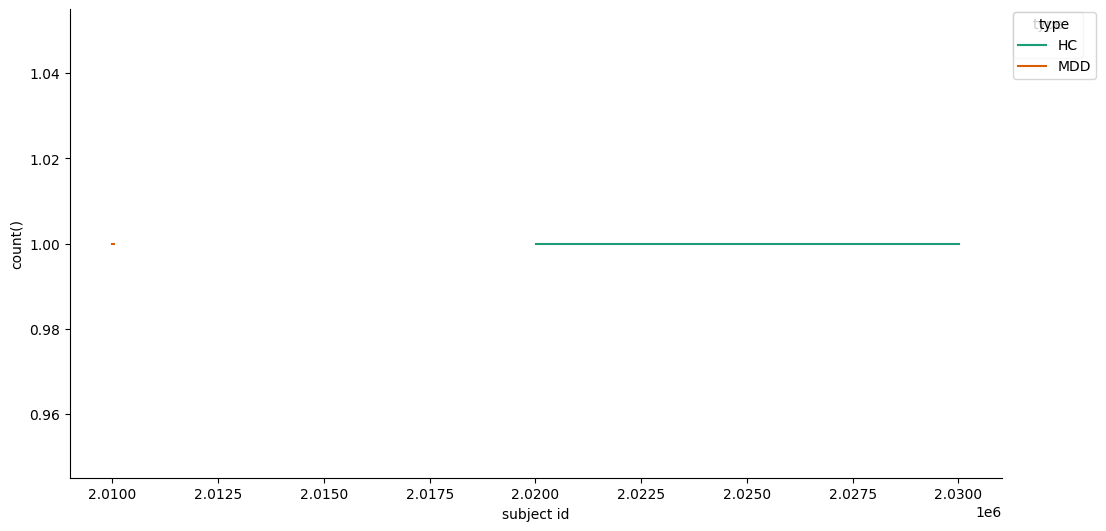

In [50]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['subject id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'subject id'}, axis=1)
              .sort_values('subject id', ascending=True))
  xs = counted['subject id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('subject id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('subject id')
_ = plt.ylabel('count()')

<ipython-input-51-0ecae7be3ebe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_8, x='index', y='type', inner='stick', palette='Dark2')


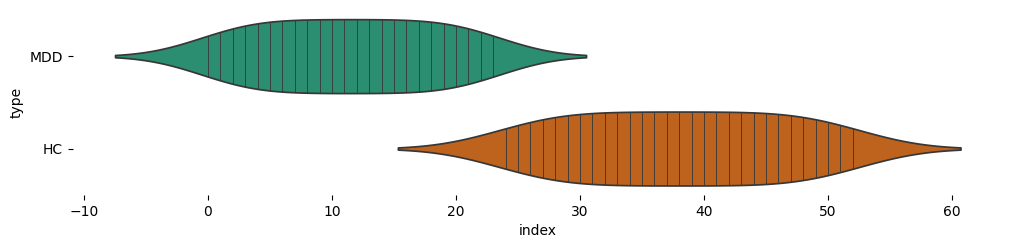

In [51]:
figsize = (12, 1.2 * len(_df_8['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-52-959a05fdd757>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_9, x='subject id', y='type', inner='stick', palette='Dark2')


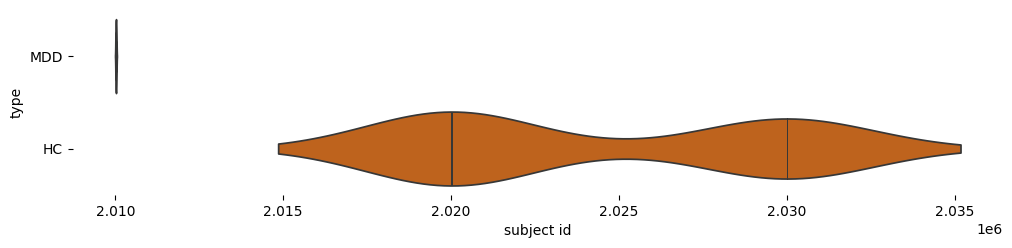

In [52]:
figsize = (12, 1.2 * len(_df_9['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='subject id', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
!mkdir MDD

mkdir: cannot create directory ‘MDD’: File exists


In [54]:
datapath="/content/drive/MyDrive/Mental Health/EEG_128channels_resting_lanzhou_2015"
save_path='/content/drive/MyDrive/MDD'
lstpath=os.listdir(datapath)
pattern='0201'
mdd_list=list(filter(lambda x: pattern in x,lstpath))
for mdd in mdd_list:
    filepath=os.path.join(datapath,mdd)
    datafile=sio.loadmat(filepath)
    r = re.compile(".*a0.*")
    dataff=list(filter(r.match, datafile))
    dataff1=dataff[0]
    dataeeg=datafile[dataff1]
    np.save(os.path.join(save_path,dataff1[1:9]+".npy"),dataeeg)

KeyboardInterrupt: 